<a href="https://colab.research.google.com/github/nimu77/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/LS_DS_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

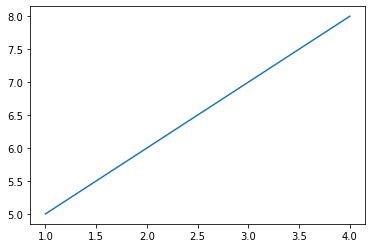

In [0]:
# graph that passes the vertical line test
plt.plot([1, 2, 3, 4], [5, 6, 7, 8])
plt.show()

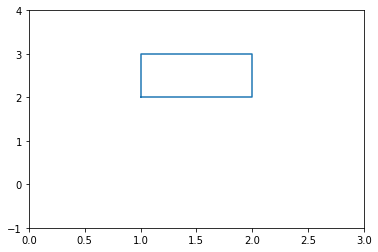

In [0]:
# graph that does not pass the vertical line test
plt.plot([1, 2, 2, 1, 1], [2, 2, 3, 3, 2])
plt.xlim(0, 3)
plt.ylim(-1, 4)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

- The graphs that don't pass the vertical line test are not considered **"functions"** because one input can have only one output. So, if the vertical line passes twice through the graph it means that one input has two output.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

- Relation 2 is a **function** because all the other relation aside from relation 2 has two or more different output for the same inputs.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

- For the function **m**, the dimensionality of the domain (input) is **3**, and the dimensionality of the domain (output) is **2**.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

- It is possible to create a function that maps from a lower dimensional space to a higher dimensional space. For example, transformational matrix, with the help of transformational matrix we are able to change the dimension of the vector.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

### Transformative matrix for the first function
\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\end{align}

\begin{align}
\\
\begin{bmatrix} x \\ x_2 \end{bmatrix} = x\begin{bmatrix} 1 \\ 0 \end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\end{align}

\begin{align}
p(\begin{bmatrix} 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
\\
p(\begin{bmatrix} 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

\begin{align}
T = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\end{align}

### Transformative matrix for the second function
\begin{align}
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
\\
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + x_3\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix}
\end{align}

\begin{align}
q(\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}) = \begin{bmatrix} 4 \\ -1 \\ 5 \end{bmatrix}
\\
q(\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}
\\
q(\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 2 \\ 3 \\ -2 \end{bmatrix}
\end{align}

\begin{align}
T = \begin{bmatrix} 4 & 1  & 2\\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

### Verifying first function with both traditional and vector-matrix multiplicaiton
\begin{align}
p(\begin{bmatrix} 3 \\ 4 \end{bmatrix}) = \begin{bmatrix} 3 + 3*4 \\ 2*4 - 3 \end{bmatrix}
\end{align}
\begin{align}
p(\begin{bmatrix} 3 \\ 4 \end{bmatrix}) = \begin{bmatrix} 15 \\ 5 \end{bmatrix}
\end{align}

- Vector-matrix multiplication

\begin{align}
\begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}\begin{bmatrix} 3 \\ 4 \end{bmatrix} = \begin{bmatrix} 15 \\ 5 \end{bmatrix}
\end{align}

### Verifying second function with both traditional and vector-matrix multiplication
\begin{align}
q(\begin{bmatrix}2 \\ 1 \\ 3\end{bmatrix}) = \begin{bmatrix} 4*2 + 1 + 2*3 \\2* 1 - 2 + 3*1 \\ 5*2 - 2*3 + 1  \end{bmatrix}
\end{align}

\begin{align}
q(\begin{bmatrix}2 \\ 1 \\ 3\end{bmatrix}) = \begin{bmatrix} 15 \\ 9 \\ 5 \end{bmatrix}
\end{align}

- vector-matrix multiplication

\begin{align}
\begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}\begin{bmatrix} 2 \\ 1 \\ 3 \end{bmatrix} = \begin{bmatrix} 15 \\ 9 \\ 5\end{bmatrix}
\end{align}

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

- **Eigenvector** is a vector that does not change its direction or orientation while transformation takes place.

    **Eigenvalue** is something that complements eigenvector. Eigenvector does not change its direction of where its pointing but it certainly can be stretched or squished. thats where **eigenvalue** comes in place where it acts like a scalar and help transform scaled during the transformation.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

- Some challenges of working with high dimensional spaces are there will be redundancy, visualization will be harder to explore, it will be very time consuming, models will be overfitted, and also the measure of distance will lose its meaning as datapoints appear to be more or less equally distributed to one another.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

- The observation should be atleast 5 times bigger than parameters.

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [116]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read National Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [0]:
pd.set_option('display.max_rows', 100)

In [118]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL                 object
AGE1                     int64
METRO3                  object
REGION                  object
LMED                     int64
FMR                      int64
L30                      int64
L50                      int64
L80                      int64
IPOV                     int64
BEDRMS                   int64
BUILT                    int64
STATUS                  object
TYPE                     int64
VALUE                    int64
VACANCY                  int64
TENURE                  object
NUNITS                   int64
ROOMS                    int64
WEIGHT                 float64
PER                      int64
ZINC2                    int64
ZADEQ                   object
ZSMHC                    int64
STRUCTURETYPE            int64
OWNRENT                 object
UTILITY                float64
OTHERCOST              float64
COST06                 float64
COST12                 float64
COST08                 float64
COSTMED                float64
TOTSAL  

In [119]:
# check for null values
national.isnull().sum().any()

False

In [120]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [121]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL                category
AGE1                      int64
METRO3                 category
REGION                 category
LMED                      int64
FMR                       int64
L30                       int64
L50                       int64
L80                       int64
IPOV                      int64
BEDRMS                    int64
BUILT                     int64
STATUS                 category
TYPE                      int64
VALUE                     int64
VACANCY                   int64
TENURE                 category
NUNITS                    int64
ROOMS                     int64
WEIGHT                  float64
PER                       int64
ZINC2                     int64
ZADEQ                  category
ZSMHC                     int64
STRUCTURETYPE             int64
OWNRENT                category
UTILITY                 float64
OTHERCOST               float64
COST06                  float64
COST12                  float64
COST08                  float64
COSTMED 

In [122]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [123]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

CONTROL                  int32
AGE1                     int64
METRO3                    int8
REGION                    int8
LMED                     int64
FMR                      int64
L30                      int64
L50                      int64
L80                      int64
IPOV                     int64
BEDRMS                   int64
BUILT                    int64
STATUS                    int8
TYPE                     int64
VALUE                    int64
VACANCY                  int64
TENURE                    int8
NUNITS                   int64
ROOMS                    int64
WEIGHT                 float64
PER                      int64
ZINC2                    int64
ZADEQ                     int8
ZSMHC                    int64
STRUCTURETYPE            int64
OWNRENT                   int8
UTILITY                float64
OTHERCOST              float64
COST06                 float64
COST12                 float64
COST08                 float64
COSTMED                float64
TOTSAL  

In [0]:
### Your Code Here
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [125]:
# Instantiate a Standard Scaler object
scaler = StandardScaler()
# Use the object to fit_transform our data
Z = scaler.fit_transform(national_processed)
print("\n Standardized Data: \n", Z)


 Standardized Data: 
 [[-1.73202397  1.48807451  0.60878419 ...  0.54947295 -0.46210707
   0.        ]
 [-1.73197029  0.08881241  2.18426992 ... -0.54470863 -0.46210707
   0.        ]
 [-1.73191661  0.21999323  2.18426992 ...  1.64365453 -0.46210707
   0.        ]
 ...
 [ 1.73191661 -1.09181499 -0.17895868 ...  1.64365453  2.16400067
   0.        ]
 [ 1.73197029  0.39490099 -0.96670154 ... -0.54470863  2.16400067
   0.        ]
 [ 1.73202397  0.78844346  1.39652706 ... -0.54470863 -0.46210707
   0.        ]]


In [0]:
# create the PCA instance
pca = PCA(2)
# fit on data
transformed_data = pca.fit(Z)

In [127]:
# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)


 Eigenvectors: 
 [[-0.01762294  0.04564172  0.00224448 -0.0056805   0.04142715  0.08969161
   0.06498292  0.0649871   0.06422065  0.06147403  0.08585244  0.01801879
  -0.05896537 -0.01528452  0.13234213 -0.05711476 -0.03969967 -0.02559715
   0.09915137  0.02420272  0.06848524  0.10804133  0.02549375  0.12591589
  -0.0686994  -0.09686185  0.09495694  0.06829523  0.13890808  0.13843111
   0.13897851  0.138511    0.0905027  -0.07741872  0.04142715  0.06498292
   0.0649871   0.06422065  0.07923954  0.0921104   0.09210336  0.09490276
   0.08739559  0.00091387  0.10149966  0.10199758  0.1018149   0.08553625
   0.09217413  0.0781451   0.13215061  0.14670343  0.1335704   0.09089986
   0.12974258  0.12772056  0.13365417  0.14824806  0.13368685  0.0902927
   0.13209618  0.12802126  0.13470573  0.1470892   0.13320525  0.08919073
   0.13411974  0.12560459  0.13025193  0.14427022  0.13314257  0.09127039
   0.1269716   0.12604755  0.02549375 -0.02868194  0.02198791 -0.06878637
   0.08502306 -0.0968

In [128]:
# transform data
B = pca.transform(Z)
print("\n Projected Data: \n", B)


 Projected Data: 
 [[-2.57657018 -1.37612732]
 [ 2.04064284 -0.98806144]
 [ 1.21527025  0.37016816]
 ...
 [ 1.83162816 -2.95570213]
 [-5.02514474 -2.52857814]
 [-9.89816404 -0.80284267]]


In [0]:
df = pd.DataFrame(B)

In [142]:
df.columns = ['PC1', 'PC2']
df

,PC1,PC2
0,-2.576570,-1.376127
1,2.040643,-0.988061
2,1.215270,0.370168
3,2.821837,1.723711
4,-1.570106,-0.878362
...,...,...
64530,-3.052490,0.413172
64531,-6.533380,-5.274883
64532,1.831628,-2.955702
64533,-5.025145,-2.528578


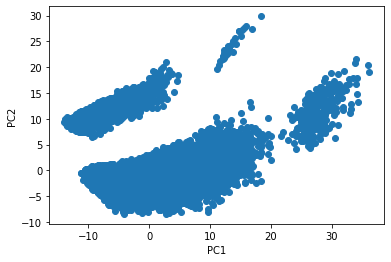

In [144]:
plt.scatter(df['PC1'], df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)